------simulate Stock Portfolio with Monte Carlo Method


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In a monte-carlo simulation, we can infer the most likely return and risk of a basket of securities based on the returns of each asset (mu), risk (sigma), and covariance among securities in the portfolio

We generate random normal returns for each security in the portfolio, which is correlated with the other randomly generated security returns

We can then determine the weighted portfolio return at each time step over a fixed period. This allows us to determine the ending portfolio value. If we generate many of these paths, we can determine the mean portfolio return and risk for a given portfolio.

- covariance matrix : shows the covariance between each stock with each other
- mean and Standard Dev : we want to calculate the volatilty and mean return for each stock

In [81]:
# The math and all Monte Carlo Steps

#import data from y- finance 
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)  

    stockData = stockData['Close']       # get closing prices into dataframe

    returns = stockData.pct_change()     # get percentage change between each consecutive closing price 

    meanReturns = returns.mean()         # Pandas series with 1 colum showng mean % return for each individual stock

    covMatrix = returns.cov()            # covariance matrix. Compute pairwise covariance of columns, in this case, covariancebetween all stocks

    return meanReturns, covMatrix


stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
StartDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, StartDate, endDate)

print('covMatrix')
display(covMatrix)                       # display covariance matrix
print('meanReturns')
display(meanReturns)                     # display mean % return beteen each closing, pandas series


weights = np.random.random(len(meanReturns))   # Return random floats in the half-open interval [0.0, 1.0).
                                               # meanReturns has length 6, 1 for each stock, 1 random WEIGHTS are assigned for each of 6 stocks

weights /= np.sum(weights)                     # so all weights would add up to 1         #   x /= 3       # is equivalent to  x = x / 3
print('weights')
display(weights)

# Monte Carlo Method start
mc_sims = 100                            # no. simulations
T = 100                                  # timeframe in days

meaniM = np.full(shape=(T, len(weights)), fill_value=meanReturns)        # array to store and retrive info
meanM = meaniM.T                                                         # mean matrix


portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)            # array of 0s 100x100
print('portfolio_sims, shape = (T, mc_sims)')
display(portfolio_sims)

initialPortfolio = 10000

for n in range(0, mc_sims):
    # mc loops
    Z = np.random.normal(size=(T, len(weights)))                        # 100 rows x 6(Stocks) columns with random probabilities in each element

    L = np.linalg.cholesky(covMatrix)                                   # cholesky decompress covMatrix into product of 2 triangular matrices

    # In linear algebra, a matrix decomposition or matrix factorization is a factorization of a matrix into a product of matrices.
    # The Cholesky decomposition is roughly twice as efficient as the LU decomposition for solving systems of linear equations

    dailyReturns = meanM + np.inner(L, Z)                               # 

    portfolio_sims[:,n] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

print('upper or lower traiangular cholesky matrix of covMatrix')
L = np.linalg.cholesky(covMatrix)
display(L)

Z = np.random.normal(size=(T, len(weights))) 
K = np.inner(L, Z)

print('mean Matrix (meaniM), 100 days = T, 100 rows, each column repeats meanReturns of each stock, each column rep a unique stock')
display(meaniM)

print('meanM is transposed meaniM')
display(meanM)

print('inner product between L and Z')
display(K)

dailyReturns = meanM + K
print('dailyReturns equals meanM + K')
display(dailyReturns) 



[*********************100%***********************]  6 of 6 completed

covMatrix


Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX
Ticker,,,,,,
BHP.AX,0.000174,0.000029,0.000015,0.000049,0.000010,0.000022
CBA.AX,0.000029,0.000142,0.000106,0.000051,0.000038,0.000106
NAB.AX,0.000015,0.000106,0.000132,0.000034,0.000030,0.000106
STO.AX,0.000049,0.000051,0.000034,0.000178,0.000028,0.000028
TLS.AX,0.000010,0.000038,0.000030,0.000028,0.000079,0.000035
WBC.AX,0.000022,0.000106,0.000106,0.000028,0.000035,0.000150


meanReturns


Ticker
BHP.AX   -0.000557
CBA.AX    0.001583
NAB.AX    0.000970
STO.AX   -0.000723
TLS.AX   -0.000080
WBC.AX    0.001609
dtype: float64

weights


array([0.22816737, 0.11453188, 0.31899128, 0.10824602, 0.14590864,
       0.08415481])

portfolio_sims, shape = (T, mc_sims)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

upper or lower traiangular cholesky matrix of covMatrix


array([[ 0.0132066 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.00219985,  0.01171692,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.0011734 ,  0.00882283,  0.00723241,  0.        ,  0.        ,
         0.        ],
       [ 0.00373063,  0.00363315, -0.00033654,  0.01227701,  0.        ,
         0.        ],
       [ 0.00078494,  0.00308355,  0.00022609,  0.00112269,  0.00822718,
         0.        ],
       [ 0.0016564 ,  0.00873059,  0.00368414, -0.0006793 ,  0.00078845,
         0.00751893]])

mean Matrix (meaniM), 100 days = T, 100 rows, each column repeats meanReturns of each stock, each column rep a unique stock


array([[-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.70149535e-04,
        -7.22879201e-04, -7.98239970e-05,  1.60888634e-03],
       [-5.57427576e-04,  1.58265949e-03,  9.701

meanM is transposed meaniM


array([[-5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-04,
        -5.57427576e-04, -5.57427576e-04, -5.57427576e-0

inner product between L and Z


array([[ 9.37429202e-03,  9.04190560e-03,  2.17224276e-03,
        -4.86721300e-03, -1.77398397e-02,  1.57710502e-02,
        -1.17465484e-02,  5.31328920e-03, -2.60731435e-02,
        -2.76901493e-02,  3.88751898e-02,  1.89490734e-02,
        -1.26301701e-02,  4.84045297e-03,  3.29436420e-03,
         3.04148632e-03,  7.91699856e-03, -1.10433904e-02,
        -6.11452850e-03,  1.42127361e-02,  6.07448033e-03,
         4.15829723e-03,  2.20497849e-03,  7.74671083e-03,
         6.23071666e-04,  1.47888211e-02,  9.46540344e-03,
         4.01326151e-02, -1.40294339e-03,  9.50218978e-03,
        -2.16788464e-02, -1.60258028e-02,  9.65709787e-03,
        -4.59688010e-03,  3.72090662e-02,  2.33606008e-02,
         3.56556790e-03, -2.59543787e-02,  1.40334353e-02,
         3.87772911e-03,  6.74818181e-03,  1.91279494e-02,
        -4.53722931e-03, -4.79266489e-03,  1.77753333e-02,
         4.00940234e-03,  1.25678444e-02, -9.26138968e-03,
        -1.95851172e-02,  3.88495047e-02, -4.04985567e-0

dailyReturns equals meanM + K


array([[ 8.81686445e-03,  8.48447802e-03,  1.61481519e-03,
        -5.42464058e-03, -1.82972673e-02,  1.52136226e-02,
        -1.23039760e-02,  4.75586163e-03, -2.66305711e-02,
        -2.82475769e-02,  3.83177622e-02,  1.83916458e-02,
        -1.31875976e-02,  4.28302540e-03,  2.73693662e-03,
         2.48405875e-03,  7.35957099e-03, -1.16008180e-02,
        -6.67195608e-03,  1.36553086e-02,  5.51705275e-03,
         3.60086966e-03,  1.64755091e-03,  7.18928325e-03,
         6.56440892e-05,  1.42313935e-02,  8.90797586e-03,
         3.95751875e-02, -1.96037096e-03,  8.94476221e-03,
        -2.22362740e-02, -1.65832304e-02,  9.09967029e-03,
        -5.15430768e-03,  3.66516386e-02,  2.28031732e-02,
         3.00814033e-03, -2.65118062e-02,  1.34760077e-02,
         3.32030153e-03,  6.19075423e-03,  1.85705218e-02,
        -5.09465689e-03, -5.35009246e-03,  1.72179057e-02,
         3.45197476e-03,  1.20104168e-02, -9.81881726e-03,
        -2.01425448e-02,  3.82920771e-02, -4.60728324e-0

Text(0.5, 1.0, 'MC Simulation of a stock portfolio')

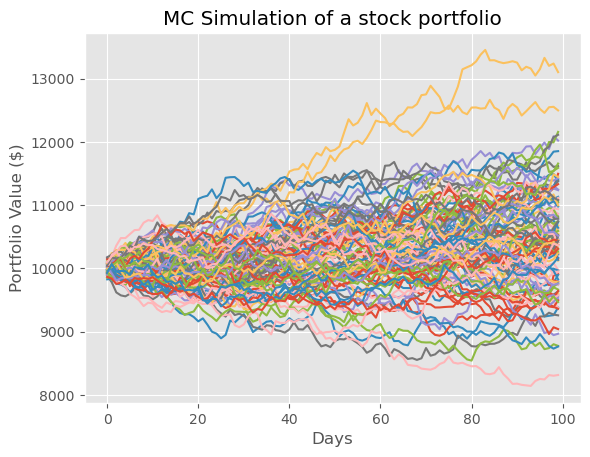

In [90]:

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC Simulation of a stock portfolio')


array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9,  7]])

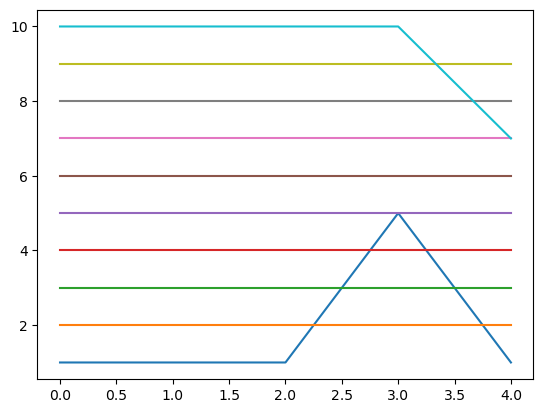

In [ ]:
# how mat plot lib plots matrices
E = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 7]])
plt.plot(E)
E  
# each column in array matrix is a line 
# and number of rows in matrix populates the x-axis

Second variation of monte carlo sim, much more simple, no matrix

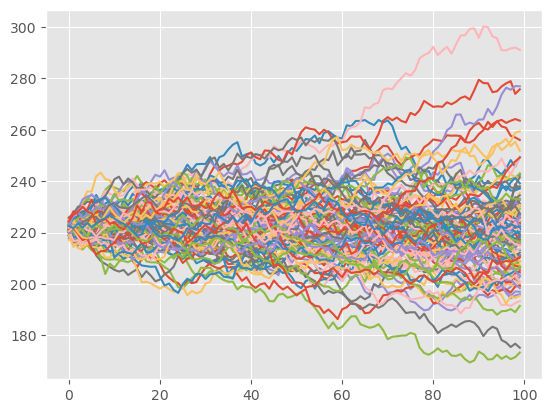

In [92]:

start = dt.datetime(2024, 11, 3)
end = dt.datetime.now()

prices = pdr.DataReader('AAPL', 'stooq', start, end)['Close']
returns = prices.pct_change()

last_price = prices.iloc[-1]

#No. Sims
num_sims = 100
num_days = 100

simulation_df = np.full((100,100), 0.0)
simulation_df = simulation_df.T

for x in range(num_sims):
    count = 0
    daily_vol = returns.std()

    price_series = []

    price = last_price*(1+np.random.normal(0,daily_vol))
    price_series.append(price)

    for y in range(num_days):
        if count == 99:
            break
        price = price_series[count]*(1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

simulation_df = simulation_df.T
plt.plot(simulation_df)


- Follow off from first monte Carlo Sim, Value at risk and Conditional Value at risk

We want to know to what "level of certainty to a percentile" of this distribution what the value at risk is, pass this defined confidence interval, know what the expected short fall is/ or the conditional value at risk.

Pass the worst 5% cases, what is my expected loss value?

In [ ]:
def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns at 100 day level
        Output: percentile on return distribution to a given cnfidence level (alpha)
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        return TypeError("expected pandas data series.")